In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [32]:
os.chdir(r'D:\python\Gold Data Cleaning')

gold_data = pd.read_csv('Gold Data 11-4-2024.csv')

gold_data

,Date,Open,High,Low,Close,% Change,% Change vs Average,Volume
0,2024-11-04T14:30:00.000Z,160.10,160.18,160.07,160.07,0.50,0.50,0
1,2024-11-04T14:31:00.000Z,159.95,159.95,159.67,159.67,-0.24,-0.24,0
2,2024-11-04T14:32:00.000Z,159.59,159.59,159.29,159.36,-0.20,-0.20,0
3,2024-11-04T14:33:00.000Z,159.36,159.37,159.23,159.27,-0.05,-0.05,0
4,2024-11-04T14:34:00.000Z,159.27,159.29,159.12,159.13,-0.09,-0.09,0
...,...,...,...,...,...,...,...,...
385,2024-11-04T20:55:00.000Z,158.73,158.78,158.71,158.78,0.04,0.04,0
386,2024-11-04T20:56:00.000Z,158.78,158.87,158.78,158.87,0.06,0.06,0
387,2024-11-04T20:57:00.000Z,158.87,158.88,158.86,158.87,0.00,0.00,0
388,2024-11-04T20:58:00.000Z,158.87,158.89,158.85,158.86,-0.01,-0.01,0


In [33]:
#Grabbing necessary variables from dataframe
price_data = gold_data[['Date','Close']]

price_data

,Date,Close
0,2024-11-04T14:30:00.000Z,160.07
1,2024-11-04T14:31:00.000Z,159.67
2,2024-11-04T14:32:00.000Z,159.36
3,2024-11-04T14:33:00.000Z,159.27
4,2024-11-04T14:34:00.000Z,159.13
...,...,...
385,2024-11-04T20:55:00.000Z,158.78
386,2024-11-04T20:56:00.000Z,158.87
387,2024-11-04T20:57:00.000Z,158.87
388,2024-11-04T20:58:00.000Z,158.86


In [55]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [35]:
price_data['Date'] = pd.to_datetime(price_data['Date'], format='mixed')
price_data

C:\Users\Jeremy Henerson\AppData\Local\Temp\ipykernel_33732\3892454746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data['Date'] = pd.to_datetime(price_data['Date'], format='mixed')


,Date,Close
0,2024-11-04 14:30:00+00:00,160.07
1,2024-11-04 14:31:00+00:00,159.67
2,2024-11-04 14:32:00+00:00,159.36
3,2024-11-04 14:33:00+00:00,159.27
4,2024-11-04 14:34:00+00:00,159.13
...,...,...
385,2024-11-04 20:55:00+00:00,158.78
386,2024-11-04 20:56:00+00:00,158.87
387,2024-11-04 20:57:00+00:00,158.87
388,2024-11-04 20:58:00+00:00,158.86


In [36]:
price_data['Time']=price_data['Date'].dt.strftime('%H:%M')
price_data


C:\Users\Jeremy Henerson\AppData\Local\Temp\ipykernel_33732\3344311338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data['Time']=price_data['Date'].dt.strftime('%H:%M')


,Date,Close,Time
0,2024-11-04 14:30:00+00:00,160.07,14:30
1,2024-11-04 14:31:00+00:00,159.67,14:31
2,2024-11-04 14:32:00+00:00,159.36,14:32
3,2024-11-04 14:33:00+00:00,159.27,14:33
4,2024-11-04 14:34:00+00:00,159.13,14:34
...,...,...,...
385,2024-11-04 20:55:00+00:00,158.78,20:55
386,2024-11-04 20:56:00+00:00,158.87,20:56
387,2024-11-04 20:57:00+00:00,158.87,20:57
388,2024-11-04 20:58:00+00:00,158.86,20:58


In [66]:
#price_data.drop('Date',axis=1,inplace=True)
price_data['Time']=pd.to_datetime(price_data['Time'])
price_data = price_data[['Time','Close']]
price_data

,Time,Close
0,2024-11-12 14:30:00,160.07
1,2024-11-12 14:31:00,159.67
2,2024-11-12 14:32:00,159.36
3,2024-11-12 14:33:00,159.27
4,2024-11-12 14:34:00,159.13
...,...,...
385,2024-11-12 20:55:00,158.78
386,2024-11-12 20:56:00,158.87
387,2024-11-12 20:57:00,158.87
388,2024-11-12 20:58:00,158.86


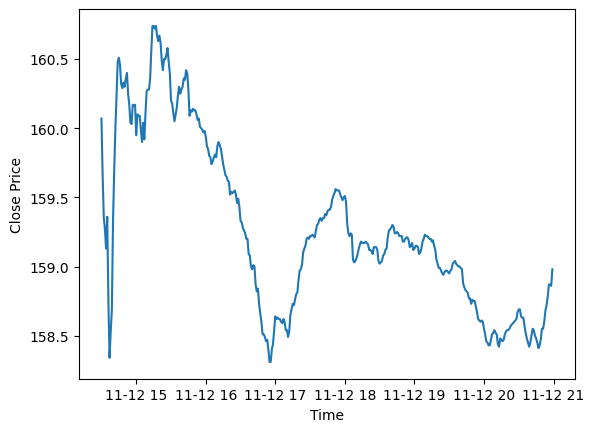

In [67]:
plt.plot(price_data['Time'],price_data['Close'])
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()